In [1]:
# Import required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

C:\Users\14407\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Load the data into a Pandas DataFrame

df_music_genre = pd.read_csv(
    "Resources/music_genre.csv")

# Display sample data

df_music_genre.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [3]:
# Drop unncessary columns

df_music_genre = df_music_genre.drop(['instance_id','artist_name', 'track_name', 'obtained_date'], axis=1)
df_music_genre.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [4]:
# Convert data type and drop NA values on tempo column

df_music_genre["tempo"] = pd.to_numeric(df_music_genre["tempo"], errors="coerce")
df_music_genre.dropna(subset=["tempo"], inplace=True)

In [5]:
df_music_genre["mode"].value_counts()

mode
Major    28874
Minor    16146
Name: count, dtype: int64

In [6]:
# Encode 
le_key = LabelEncoder()
df_music_genre["key"] = le_key.fit_transform(df_music_genre["key"])

le_mode = LabelEncoder()
df_music_genre["mode"] = le_mode.fit_transform(df_music_genre["mode"])

le_music_genre = LabelEncoder()
df_music_genre["music_genre"] = le_mode.fit_transform(df_music_genre["music_genre"])

df_music_genre.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,5


In [7]:
# Check data types
df_music_genre.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int32
liveness            float64
loudness            float64
mode                  int32
speechiness         float64
tempo               float64
valence             float64
music_genre           int32
dtype: object

In [8]:
# Define features set
X = df_music_genre.copy()
X.drop("music_genre", axis=1, inplace=True)
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323


In [9]:
# Define target vector
y = df_music_genre['music_genre'].ravel()
y[:5]

C:\Users\14407\AppData\Local\Temp\ipykernel_15692\243308573.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df_music_genre['music_genre'].ravel()


array([5, 5, 5, 5, 5])

In [10]:
# Splitting into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [12]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [13]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Random Forest Model

In [14]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=99)

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making Predictions Using the Random Forest Model

In [16]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Model Evaluation

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4", "Actual 5", "Actual 6", "Actual 7", "Actual 8", "Actual 9"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6", "Predicted 7", "Predicted 8", "Predicted 9"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,397,14,19,3,140,56,96,63,54,240
Actual 1,35,840,59,87,31,39,0,16,0,9
Actual 2,68,85,628,15,92,74,8,116,0,54
Actual 3,26,51,24,926,5,16,1,49,0,4
Actual 4,88,15,69,1,694,13,16,58,23,232
Actual 5,80,32,78,7,26,664,15,135,9,29
Actual 6,66,0,1,0,13,7,427,6,527,55
Actual 7,37,14,136,67,47,143,27,619,5,41
Actual 8,55,0,1,0,10,1,616,3,345,133
Actual 9,145,3,22,5,96,8,46,21,55,728


Accuracy Score : 0.5569080408707241
Classification Report
              precision    recall  f1-score   support

           0       0.40      0.37      0.38      1082
           1       0.80      0.75      0.77      1116
           2       0.61      0.55      0.58      1140
           3       0.83      0.84      0.84      1102
           4       0.60      0.57      0.59      1209
           5       0.65      0.62      0.63      1075
           6       0.34      0.39      0.36      1102
           7       0.57      0.54      0.56      1136
           8       0.34      0.30      0.32      1164
           9       0.48      0.64      0.55      1129

    accuracy                           0.56     11255
   macro avg       0.56      0.56      0.56     11255
weighted avg       0.56      0.56      0.56     11255



# Feature Importance

In [19]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.18208272807302683, 'popularity'),
 (0.09245226866138212, 'loudness'),
 (0.09230941767701266, 'speechiness'),
 (0.09167470281030506, 'danceability'),
 (0.0892661104111891, 'acousticness'),
 (0.08284955977569369, 'instrumentalness'),
 (0.08012450557267664, 'energy'),
 (0.07069159340673184, 'valence'),
 (0.06277452649253337, 'duration_ms'),
 (0.05785712493401546, 'tempo'),
 (0.05191971165886704, 'liveness'),
 (0.034095580660949, 'key'),
 (0.011902169865617365, 'mode')]

<Axes: title={'center': 'Feature Importance'}, ylabel='1'>

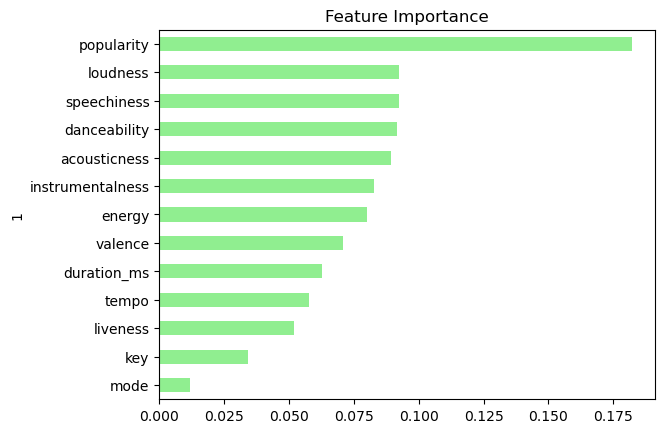

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importance', legend=False)